In [1]:


import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files





from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab


import matplotlib as mpl
import matplotlib.pyplot as plt

print('Libraries imported.')



Libraries imported.


In [2]:
url = 'https://raw.githubusercontent.com/Daylen-Mackey/dog-house-training/master/Luna%20Tracking.csv'
sheet = pd.read_csv(url)
sheet.head(82)

,Date,Day #,# Pees,# Poops,Notes
0,2019-05-30,1.0,1.0,0.0,NaN
1,2019-05-31,2.0,2.0,1.0,NaN
2,2019-06-01,3.0,1.0,1.0,NaN
3,2019-06-02,4.0,1.0,2.0,NaN
4,2019-06-03,5.0,2.0,1.0,NaN
5,2019-06-04,6.0,2.0,1.0,NaN
6,2019-06-05,7.0,4.0,0.0,NaN
7,2019-06-06,8.0,5.0,1.0,NaN
8,2019-06-07,9.0,1.0,1.0,NaN
9,2019-06-08,10.0,3.0,1.0,NaN


In [3]:
df = sheet[:80]

In [4]:
df.tail()

,Date,Day #,# Pees,# Poops,Notes
75,2019-08-13,76.0,2.0,1.0,NaN
76,2019-08-14,77.0,1.0,1.0,NaN
77,2019-08-15,78.0,0.0,0.0,NaN
78,2019-08-16,79.0,0.0,0.0,NaN
79,2019-08-17,80.0,0.0,0.0,NaN


# Cleaning the Data

In [6]:
df.columns = ["Date","DayNo", "Pees","Poops", "Notes"]
df.head()


,Date,DayNo,Pees,Poops,Notes
0,2019-05-30,1.0,1.0,0.0,NaN
1,2019-05-31,2.0,2.0,1.0,NaN
2,2019-06-01,3.0,1.0,1.0,NaN
3,2019-06-02,4.0,1.0,2.0,NaN
4,2019-06-03,5.0,2.0,1.0,NaN


In [7]:
df.Pees.replace(np.nan,0,inplace = True)
df.Poops.replace(np.nan,0,inplace = True)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
# df.set_index('DayNo', inplace = True)
# df.drop('Date', axis = 1, inplace = True)
df

,Date,DayNo,Pees,Poops,Notes
0,2019-05-30,1.0,1.0,0.0,NaN
1,2019-05-31,2.0,2.0,1.0,NaN
2,2019-06-01,3.0,1.0,1.0,NaN
3,2019-06-02,4.0,1.0,2.0,NaN
4,2019-06-03,5.0,2.0,1.0,NaN
5,2019-06-04,6.0,2.0,1.0,NaN
6,2019-06-05,7.0,4.0,0.0,NaN
7,2019-06-06,8.0,5.0,1.0,NaN
8,2019-06-07,9.0,1.0,1.0,NaN
9,2019-06-08,10.0,3.0,1.0,NaN


In [11]:
peeFrequency = df.groupby('Pees')['Pees']

for key, item in peeFrequency:
    print(peeFrequency.get_group(key), "\n\n")


17    0.0
25    0.0
27    0.0
39    0.0
40    0.0
53    0.0
54    0.0
56    0.0
58    0.0
66    0.0
77    0.0
78    0.0
79    0.0
Name: Pees, dtype: float64 


0     1.0
2     1.0
3     1.0
8     1.0
15    1.0
16    1.0
18    1.0
21    1.0
22    1.0
26    1.0
29    1.0
32    1.0
33    1.0
38    1.0
42    1.0
46    1.0
47    1.0
49    1.0
51    1.0
52    1.0
55    1.0
57    1.0
60    1.0
65    1.0
67    1.0
68    1.0
69    1.0
71    1.0
73    1.0
74    1.0
76    1.0
Name: Pees, dtype: float64 


1     2.0
4     2.0
5     2.0
13    2.0
14    2.0
19    2.0
20    2.0
28    2.0
30    2.0
34    2.0
35    2.0
36    2.0
41    2.0
43    2.0
45    2.0
48    2.0
59    2.0
61    2.0
62    2.0
63    2.0
64    2.0
75    2.0
Name: Pees, dtype: float64 


9     3.0
23    3.0
24    3.0
31    3.0
37    3.0
44    3.0
72    3.0
Name: Pees, dtype: float64 


6     4.0
11    4.0
Name: Pees, dtype: float64 


7     5.0
50    5.0
Name: Pees, dtype: float64 


70    7.0
Name: Pees, dtype: float64 


10    8.0


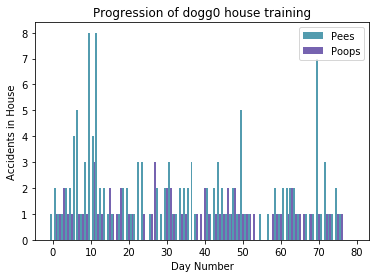

In [10]:
def groupedbarplot(x_data, y_data_list, y_data_names, colors, x_label, y_label, title):
    _, ax = plt.subplots()
    # Total width for all bars at one x location
    total_width = 1
    # Width of each individual bar
    ind_width = total_width / len(y_data_list)
    # This centers each cluster of bars about the x tick mark
    alteration = np.arange(-(total_width/2), total_width/2, ind_width)

    # Draw bars, one category at a time
    for i in range(0, len(y_data_list)):
        # Move the bar to the right on the x-axis so it doesn't
        # overlap with previously drawn ones
        ax.bar(x_data + alteration[i], y_data_list[i], color = colors[i], label = y_data_names[i], width = ind_width)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

# Call the function to create plot
groupedbarplot(x_data = df.index
               , y_data_list = [df.Pees, df.Poops]
               , y_data_names = ['Pees', 'Poops']
               , colors = ['#539caf', '#7663b0']
               , x_label = 'Day Number'
               , y_label = 'Accidents in House'
               , title = 'Progression of dogg0 house training')

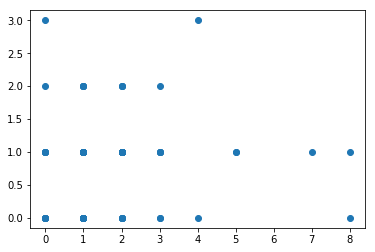

In [38]:
plt.plot( 'Pees', 'Poops', data=df, linestyle='none', marker='o')
plt.show()

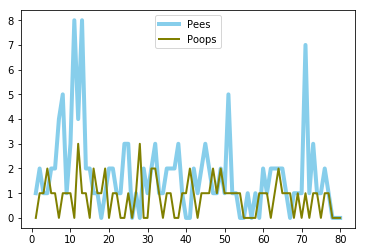

In [12]:
plt.plot( 'DayNo', 'Pees', data=df, marker='', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'DayNo', 'Poops', data=df, marker='', color='olive', linewidth=2)
plt.legend()

In [22]:
df2 = df.copy()
df2.Date=pd.to_datetime(df2.Date)
df2["Day"] = df2.Date.dt.weekday_name

In [27]:
df2.groupby(df2['Day']).describe()

DayNo                                                  Pees  \
          count  mean        std  min    25%   50%    75%   max count   
Day                                                                     
Friday     12.0  40.5  25.238859  2.0  21.25  40.5  59.75  79.0  12.0   
Monday     11.0  40.0  23.216374  5.0  22.50  40.0  57.50  75.0  11.0   
Saturday   12.0  41.5  25.238859  3.0  22.25  41.5  60.75  80.0  12.0   
Sunday     11.0  39.0  23.216374  4.0  21.50  39.0  56.50  74.0  11.0   
Thursday   12.0  39.5  25.238859  1.0  20.25  39.5  58.75  78.0  12.0   
Tuesday    11.0  41.0  23.216374  6.0  23.50  41.0  58.50  76.0  11.0   
Wednesday  11.0  42.0  23.216374  7.0  24.50  42.0  59.50  77.0  11.0   

                                                       Poops            \
               mean       std  min  25%  50%  75%  max count      mean   
Day                                                                      
Friday     1.583333  1.240112  0.0  1.0  1.0  2.0  5.0  12.0  0.583333   
Monday     1.090909  1.136182  0.0  0.5  1.0  1.0  4.0  11.0  1.090909   
Saturday   1.750000  1.215431  0.0  1.0  1.5  3.0  3.0  12.0  0.833333   
Sunday     2.000000  2.236068  0.0  1.0  1.0  2.5  8.0  11.0  1.090909   
Thursday   2.000000  2.044949  0.0  1.0  1.5  2.0  7.0  12.0  0.583333   
Tuesday    1.818182  2.182576  0.0  1.0  1.0  2.0  8.0  11.0  0.727273   
Wednesday  1.727273  1.009050  0.0  1.0  2.0  2.0  4.0  11.0  1.000000   

                                               
                std  min   25%  50%  75%  max  
Day                                            
Friday     0.668558  0.0  0.00  0.5  1.0  2.0  
Monday     0.943880  0.0  0.50  1.0  1.5  3.0  
Saturday   0.577350  0.0  0.75  1.0  1.0  2.0  
Sunday     0.539360  0.0  1.00  1.0  1.0  2.0  
Thursday   0.668558  0.0  0.00  0.5  1.0  2.0  
Tuesday    0.646670  0.0  0.00  1.0  1.0  2.0  
Wednesday  0.894427  0.0  0.50  1.0  1.0  3.0

In [39]:
df2.groupby(df2['Day']).describe()

DayNo                                                  Pees  \
          count  mean        std  min    25%   50%    75%   max count   
Day                                                                     
Friday     12.0  40.5  25.238859  2.0  21.25  40.5  59.75  79.0  12.0   
Monday     11.0  40.0  23.216374  5.0  22.50  40.0  57.50  75.0  11.0   
Saturday   12.0  41.5  25.238859  3.0  22.25  41.5  60.75  80.0  12.0   
Sunday     11.0  39.0  23.216374  4.0  21.50  39.0  56.50  74.0  11.0   
Thursday   12.0  39.5  25.238859  1.0  20.25  39.5  58.75  78.0  12.0   
Tuesday    11.0  41.0  23.216374  6.0  23.50  41.0  58.50  76.0  11.0   
Wednesday  11.0  42.0  23.216374  7.0  24.50  42.0  59.50  77.0  11.0   

                                                       Poops            \
               mean       std  min  25%  50%  75%  max count      mean   
Day                                                                      
Friday     1.583333  1.240112  0.0  1.0  1.0  2.0  5.0  12.0  0.583333   
Monday     1.090909  1.136182  0.0  0.5  1.0  1.0  4.0  11.0  1.090909   
Saturday   1.750000  1.215431  0.0  1.0  1.5  3.0  3.0  12.0  0.833333   
Sunday     2.000000  2.236068  0.0  1.0  1.0  2.5  8.0  11.0  1.090909   
Thursday   2.000000  2.044949  0.0  1.0  1.5  2.0  7.0  12.0  0.583333   
Tuesday    1.818182  2.182576  0.0  1.0  1.0  2.0  8.0  11.0  0.727273   
Wednesday  1.727273  1.009050  0.0  1.0  2.0  2.0  4.0  11.0  1.000000   

                                               
                std  min   25%  50%  75%  max  
Day                                            
Friday     0.668558  0.0  0.00  0.5  1.0  2.0  
Monday     0.943880  0.0  0.50  1.0  1.5  3.0  
Saturday   0.577350  0.0  0.75  1.0  1.0  2.0  
Sunday     0.539360  0.0  1.00  1.0  1.0  2.0  
Thursday   0.668558  0.0  0.00  0.5  1.0  2.0  
Tuesday    0.646670  0.0  0.00  1.0  1.0  2.0  
Wednesday  0.894427  0.0  0.50  1.0  1.0  3.0

In [84]:
grouped = df2.groupby(df2['Day'])

for name,group in grouped:
   print(name)
   print (group)
    


dayList

Friday
         Date  DayNo  Pees  Poops          Notes     Day
1  2019-05-31    2.0   2.0    1.0            NaN  Friday
8  2019-06-07    9.0   1.0    1.0            NaN  Friday
15 2019-06-14   16.0   1.0    2.0            NaN  Friday
22 2019-06-21   23.0   1.0    0.0            NaN  Friday
29 2019-06-28   30.0   1.0    0.0  Excitment Pee  Friday
36 2019-07-05   37.0   2.0    0.0            NaN  Friday
43 2019-07-12   44.0   2.0    1.0            NaN  Friday
50 2019-07-19   51.0   5.0    1.0            NaN  Friday
57 2019-07-26   58.0   1.0    0.0            NaN  Friday
64 2019-08-02   65.0   2.0    1.0            NaN  Friday
71 2019-08-09   72.0   1.0    0.0            NaN  Friday
78 2019-08-16   79.0   0.0    0.0            NaN  Friday
Monday
         Date  DayNo  Pees  Poops Notes     Day
4  2019-06-03    5.0   2.0    1.0   NaN  Monday
11 2019-06-10   12.0   4.0    3.0   NaN  Monday
18 2019-06-17   19.0   1.0    2.0   NaN  Monday
25 2019-06-24   26.0   0.0    0.0   NaN  Monday
32 20

[         Date  DayNo  Pees  Poops          Notes     Day
 1  2019-05-31    2.0   2.0    1.0            NaN  Friday
 8  2019-06-07    9.0   1.0    1.0            NaN  Friday
 15 2019-06-14   16.0   1.0    2.0            NaN  Friday
 22 2019-06-21   23.0   1.0    0.0            NaN  Friday
 29 2019-06-28   30.0   1.0    0.0  Excitment Pee  Friday
 36 2019-07-05   37.0   2.0    0.0            NaN  Friday
 43 2019-07-12   44.0   2.0    1.0            NaN  Friday
 50 2019-07-19   51.0   5.0    1.0            NaN  Friday
 57 2019-07-26   58.0   1.0    0.0            NaN  Friday
 64 2019-08-02   65.0   2.0    1.0            NaN  Friday
 71 2019-08-09   72.0   1.0    0.0            NaN  Friday
 78 2019-08-16   79.0   0.0    0.0            NaN  Friday,
          Date  DayNo  Pees  Poops Notes     Day
 4  2019-06-03    5.0   2.0    1.0   NaN  Monday
 11 2019-06-10   12.0   4.0    3.0   NaN  Monday
 18 2019-06-17   19.0   1.0    2.0   NaN  Monday
 25 2019-06-24   26.0   0.0    0.0   NaN  Monday


In [78]:
import plotly.plotly as py
import plotly.tools as tls

TypeError: must be str, not DatetimeIndex

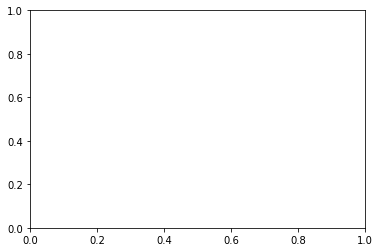

In [82]:
data = dayList

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)

ax.boxplot(data)

plotly_fig = tls.mpl_to_plotly( mpl_fig )
py.iplot(plotly_fig, filename='mpl-multiple-boxplot')

NameError: name 'subplots_adjust' is not defined

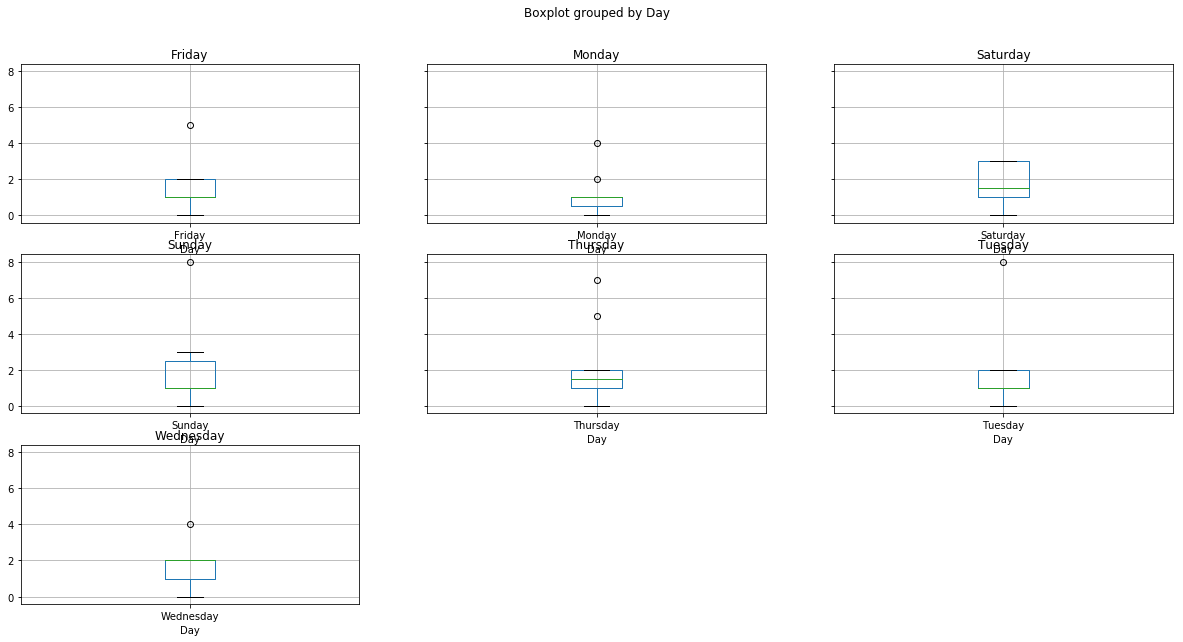

In [77]:
left  = 0.125  # the left side of the subplots of the figure
right = 0.9    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 0.9      # the top of the subplots of the figure
wspace = 0.2   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

grouped.boxplot(column='Pees', by='Day',figsize=(20, 10))
subplots_adjust(left, bottom, right, top, wspace, hspace)

# plt.show()



ValueError: cannot copy sequence with size 7 to array axis with dimension 24

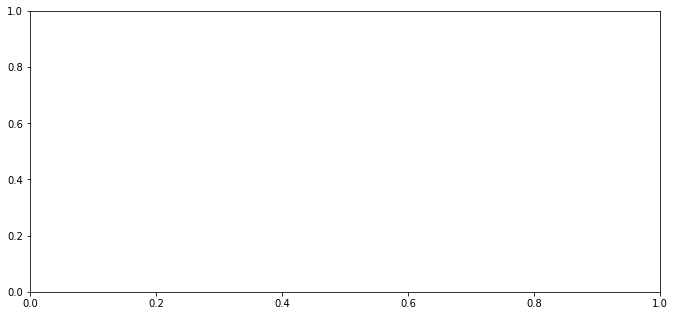

In [68]:

fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.set_window_title('A Boxplot Example')
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=0, sym='+', vert=1, whis=1.5)
plt.setp(bp['boxes'], color='black')
plt.setp(bp['whiskers'], color='black')
plt.setp(bp['fliers'], color='red', marker='+')

# Add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
               alpha=0.5)

# Hide these grid behind plot objects
ax1.set_axisbelow(True)
ax1.set_title('Comparison of IID Bootstrap Resampling Across Five Distributions')
ax1.set_xlabel('Distribution')
ax1.set_ylabel('Value')

# Now fill the boxes with desired colors
box_colors = ['darkkhaki', 'royalblue']
num_boxes = len(data)
medians = np.empty(num_boxes)
for i in range(num_boxes):
    box = bp['boxes'][i]
    boxX = []
    boxY = []
    for j in range(5):
        boxX.append(box.get_xdata()[j])
        boxY.append(box.get_ydata()[j])
    box_coords = np.column_stack([boxX, boxY])
    # Alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # Now draw the median lines back over what we just filled in
    med = bp['medians'][i]
    medianX = []
    medianY = []
    for j in range(2):
        medianX.append(med.get_xdata()[j])
        medianY.append(med.get_ydata()[j])
        ax1.plot(medianX, medianY, 'k')
    medians[i] = medianY[0]
    # Finally, overplot the sample averages, with horizontal alignment
    # in the center of each box
    ax1.plot(np.average(med.get_xdata()), np.average(data[i]),
             color='w', marker='*', markeredgecolor='k')

# Set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(random_dists, 2),
                    rotation=45, fontsize=8)

# Due to the Y-axis scale being different across samples, it can be
# hard to compare differences in medians across the samples. Add upper
# X-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
pos = np.arange(num_boxes) + 1
upper_labels = [str(np.round(s, 2)) for s in medians]
weights = ['bold', 'semibold']
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(pos[tick], .95, upper_labels[tick],
             transform=ax1.get_xaxis_transform(),
             horizontalalignment='center', size='x-small',
             weight=weights[k], color=box_colors[k])

# Finally, add a basic legend
fig.text(0.80, 0.08, f'{N} Random Numbers',
         backgroundcolor=box_colors[0], color='black', weight='roman',
         size='x-small')
fig.text(0.80, 0.045, 'IID Bootstrap Resample',
         backgroundcolor=box_colors[1],
         color='white', weight='roman', size='x-small')
fig.text(0.80, 0.015, '*', color='white', backgroundcolor='silver',
         weight='roman', size='medium')
fig.text(0.815, 0.013, ' Average Value', color='black', weight='roman',
         size='x-small')

plt.show()